## **Contexto da Análise**

Esta análise utiliza uma base de dados simulada de vendas da Apple, contendo informações sobre produtos, categorias, lojas, vendas e registros de garantia. 

O objetivo do projeto é avaliar o desempenho comercial da empresa sob diferentes perspectivas — mix de produtos, performance geográfica, evolução temporal da receita e qualidade no pós-venda — a fim de identificar os principais motores de crescimento do negócio e possíveis riscos operacionais.

### 📊 **Subanálises**

1. Performance de Produtos
2. Desempenho Geográfico e por Unidade
3. Evolução Temporal de Receita
4. Risco e Incidência de Garantias

### Análise Exploratória

In [203]:
# notebook setup
# sys para interagir com o interpretador python
import sys
# pathlib facilita o trabalho com caminhos de arquivos e diretórios
from pathlib import Path

# adicionando a pasta raiz do projeto ao pythonpath
# permite a importação de módulos da pasta src
root_dir = Path().resolve().parent
sys.path.append(str(root_dir))

# ocultando mensagens de saída
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [204]:
# imports
# bibliotecas
# pandas para manipulação e análise de dados
import pandas as pd
# bibliotecas para visualização de dados 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px

# funções de carregamento de dados 
from src.utils import load_data
# funções de conversão
from src.data_cleaning import convert_dates
# importando os paths das tabelas (tratadas e brutas) geradas na etapa anterior de processamento
from src.paths import products_processed_path, category_raw_path, stores_processed_path, sales_processed_path, warranty_processed_path

In [205]:
# carregando os dados
# tabela categorias
df_category = load_data(category_raw_path)
df_category

,category_id,category_name
0,CAT-1,Laptop
1,CAT-2,Audio
2,CAT-3,Tablet
3,CAT-4,Smartphone
4,CAT-5,Wearable
5,CAT-6,Streaming Device
6,CAT-7,Desktop
7,CAT-8,Subscription Service
8,CAT-9,Smart Speaker
9,CAT-10,Accessories


In [206]:
df_category['category_name'].unique()

<StringArray>
[              'Laptop',                'Audio',               'Tablet',
           'Smartphone',             'Wearable',     'Streaming Device',
              'Desktop', 'Subscription Service',        'Smart Speaker',
          'Accessories']
Length: 10, dtype: str

In [207]:
# tabela produtos
df_products = load_data(products_processed_path)
df_products.head(5)

,product_id,product_name,category_id,launch_date,price
0,P-1,MacBook,CAT-1,2023-09-17,1149
1,P-2,MacBook Air (M1),CAT-1,2023-11-11,1783
2,P-3,MacBook Air (M2),CAT-1,2020-05-24,1588
3,P-4,MacBook Pro 13-inch,CAT-1,2021-01-17,1351
4,P-5,MacBook Pro 14-inch,CAT-1,2024-05-12,768


In [208]:
df_products.info()

<class 'pandas.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   product_id    89 non-null     str  
 1   product_name  89 non-null     str  
 2   category_id   89 non-null     str  
 3   launch_date   89 non-null     str  
 4   price         89 non-null     int64
dtypes: int64(1), str(4)
memory usage: 3.6 KB


In [209]:
# tabelas lojas
df_stores = load_data(stores_processed_path)
df_stores.head(5)

,store_id,store_name,city,country
0,ST-1,Apple Fifth Avenue,New York,United States
1,ST-2,Apple Union Square,San Francisco,United States
2,ST-3,Apple Michigan Avenue,Chicago,United States
3,ST-4,Apple The Grove,Los Angeles,United States
4,ST-5,Apple SoHo,New York,United States


In [210]:
df_stores['country'].unique()

<StringArray>
[ 'United States', 'United Kingdom',         'France',        'Austria',
          'Spain',          'Italy',        'Germany',    'Netherlands',
            'UAE',          'Japan',          'China',         'Taiwan',
       'Thailand',      'Singapore',         'Canada',      'Australia',
         'Mexico',       'Colombia',    'South Korea']
Length: 19, dtype: str

In [211]:
# tabela vendas
df_sales = load_data(sales_processed_path)
df_sales.head(5)

,sale_id,sale_date,store_id,product_id,quantity
0,YG-8782,2023-06-16,ST-10,P-38,10
1,QX-999001,2022-04-13,ST-63,P-48,10
2,JG-46890,2021-07-05,ST-26,P-79,5
3,XJ-1731,2022-07-20,ST-15,P-24,9
4,FG-95080,2022-03-18,ST-35,P-69,7


In [212]:
df_sales.describe(include=object)

,sale_id,sale_date,store_id,product_id
count,1040200,1040200,1040200,1040200
unique,1040200,1778,75,89
top,YG-8782,2022-08-10,ST-30,P-60
freq,1,661,14113,11893


In [213]:
# tabela garantia
df_warranty = load_data(warranty_processed_path)
df_warranty.head(5)

,claim_id,claim_date,sale_id,repair_status
0,CL-58750,2024-01-30,YG-8782,Completed
1,CL-8874,2024-06-25,QX-999001,Pending
2,CL-14486,2024-08-13,JG-46890,Pending
3,CL-42187,2024-09-19,XJ-1731,Pending
4,CL-37590,2024-09-16,FG-95080,Completed


In [214]:
df_warranty.describe(include=object)

,claim_id,claim_date,sale_id,repair_status
count,30000,30000,30000,30000
unique,30000,317,30000,4
top,CL-58750,2024-04-08,YG-8782,In Progress
freq,1,127,1,7611


In [215]:
# consolidando dados de produto, loja e vendas para análise de desempenho
# produtos e categorias
df_products_category = (
  df_products.merge(
    df_category,
    on='category_id',
    how='left'
  )
)

df_products_category.head(5)

,product_id,product_name,category_id,launch_date,price,category_name
0,P-1,MacBook,CAT-1,2023-09-17,1149,Laptop
1,P-2,MacBook Air (M1),CAT-1,2023-11-11,1783,Laptop
2,P-3,MacBook Air (M2),CAT-1,2020-05-24,1588,Laptop
3,P-4,MacBook Pro 13-inch,CAT-1,2021-01-17,1351,Laptop
4,P-5,MacBook Pro 14-inch,CAT-1,2024-05-12,768,Laptop


In [216]:
# produtos, lojas e vendas
df_sales_merged = (
  df_sales
  .merge(df_products_category, on='product_id', how='left')
  .merge(df_stores, on='store_id', how='left')
)

# criando uma coluna para o total da venda
df_sales_merged['total_revenue'] = df_sales_merged['price'] * df_sales_merged['quantity']

# reorganizando as colunas para melhor visualização
df_sales_merged = df_sales_merged[
  ['sale_id', 'sale_date', 
    'product_id', 'product_name', 'price', 'launch_date', 
    'quantity', 'total_revenue', 'category_id', 'category_name', 
    'store_id', 'store_name', 'city', 'country']
]

df_sales_merged.head(5)

,sale_id,sale_date,product_id,product_name,price,launch_date,quantity,total_revenue,category_id,category_name,store_id,store_name,city,country
0,YG-8782,2023-06-16,P-38,iPhone 13 Pro,308,2021-03-22,10,3080,CAT-4,Smartphone,ST-10,Apple South Coast Plaza,Costa Mesa,United States
1,QX-999001,2022-04-13,P-48,Apple Watch Nike Edition,884,2020-06-24,10,8840,CAT-5,Wearable,ST-63,Apple Parque La Colina,Bogota,Colombia
2,JG-46890,2021-07-05,P-79,Magic Trackpad,1242,2024-05-25,5,6210,CAT-10,Accessories,ST-26,Apple Leidseplein,Amsterdam,Netherlands
3,XJ-1731,2022-07-20,P-24,iPad mini (6th Generation),573,2022-11-27,9,5157,CAT-3,Tablet,ST-15,Apple Downtown Brooklyn,Brooklyn,United States
4,FG-95080,2022-03-18,P-69,Apple TV+,404,2024-11-04,7,2828,CAT-8,Subscription Service,ST-35,Apple Shanghai IFC,Shanghai,China


In [217]:
# vendas e garantia 
df_sales_warranty = (
  df_warranty.merge(
    df_sales_merged,
    on='sale_id',
    how='inner'
  )
)

# reorganizando as colunas para melhor visualização
df_sales_warranty = df_sales_warranty[
  ['claim_id', 'claim_date', 'repair_status', 'sale_id', 'sale_date',
    'product_id', 'product_name', 'price', 'launch_date', 'quantity',
    'total_revenue', 'category_id', 'category_name', 'store_id',
    'store_name', 'city', 'country']
]

df_sales_warranty.head(5)


,claim_id,claim_date,repair_status,sale_id,sale_date,product_id,product_name,price,launch_date,quantity,total_revenue,category_id,category_name,store_id,store_name,city,country
0,CL-58750,2024-01-30,Completed,YG-8782,2023-06-16,P-38,iPhone 13 Pro,308,2021-03-22,10,3080,CAT-4,Smartphone,ST-10,Apple South Coast Plaza,Costa Mesa,United States
1,CL-8874,2024-06-25,Pending,QX-999001,2022-04-13,P-48,Apple Watch Nike Edition,884,2020-06-24,10,8840,CAT-5,Wearable,ST-63,Apple Parque La Colina,Bogota,Colombia
2,CL-14486,2024-08-13,Pending,JG-46890,2021-07-05,P-79,Magic Trackpad,1242,2024-05-25,5,6210,CAT-10,Accessories,ST-26,Apple Leidseplein,Amsterdam,Netherlands
3,CL-42187,2024-09-19,Pending,XJ-1731,2022-07-20,P-24,iPad mini (6th Generation),573,2022-11-27,9,5157,CAT-3,Tablet,ST-15,Apple Downtown Brooklyn,Brooklyn,United States
4,CL-37590,2024-09-16,Completed,FG-95080,2022-03-18,P-69,Apple TV+,404,2024-11-04,7,2828,CAT-8,Subscription Service,ST-35,Apple Shanghai IFC,Shanghai,China


### 🔹Performance de Produtos

- Quais são os produtos mais lucrativos?

In [218]:
# receita por produto
df_revenue_by_products = (
  df_sales_merged.groupby('product_name')
  .agg(
    total_quantity=('quantity','sum'),
    total_revenue=('total_revenue','sum')
  )
  .sort_values('total_revenue', ascending=False)
  .head(10)
)

df_revenue_by_products

,total_quantity,total_revenue
product_name,,
Apple Music,63844,125453460
iMac 27-inch,64654,124006372
iPad mini (5th Generation),64828,123951136
iPad (9th Generation),63597,123950553
Beats Fit Pro,64410,118449990
MacBook Air (Retina),63947,118110109
AirPods (3rd Generation),64102,118075884
iPad Pro (M2),63543,116029518
iPad Pro 11-inch,64768,114056448


- Quais categorias concentram maior volume de vendas?

In [219]:
# volume de vendas por categoria
df_volume_by_category = (
  df_sales_merged.groupby('category_name')
  .agg(total_sales=('sale_id', 'count'))
  .sort_values('total_sales', ascending=False)
)

df_volume_by_category

,total_sales
category_name,
Accessories,163849
Smartphone,151636
Audio,128731
Tablet,117142
Desktop,116812
Laptop,116369
Wearable,105521
Subscription Service,81561
Streaming Device,35014


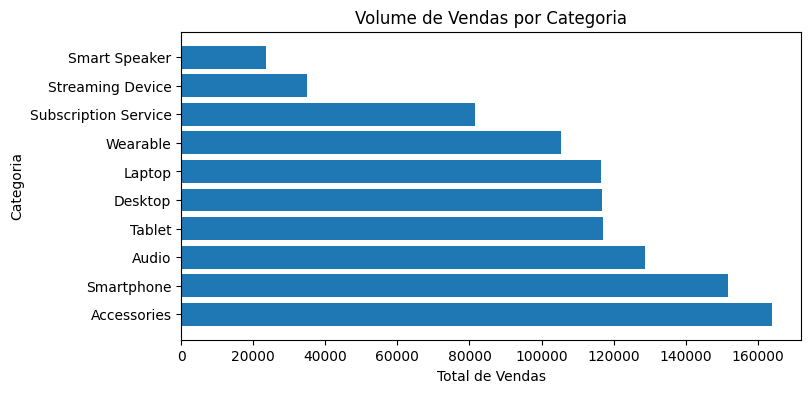

In [220]:
# resetando o índice para garantir que category_name seja lido como coluna
df_volume_by_category = df_volume_by_category.reset_index()

# gráfico de barras
plt.figure(figsize=(8,4))
plt.barh(
  df_volume_by_category['category_name'], 
  df_volume_by_category['total_sales']
)
plt.title("Volume de Vendas por Categoria")
plt.xlabel("Total de Vendas")
plt.ylabel("Categoria")
plt.show()

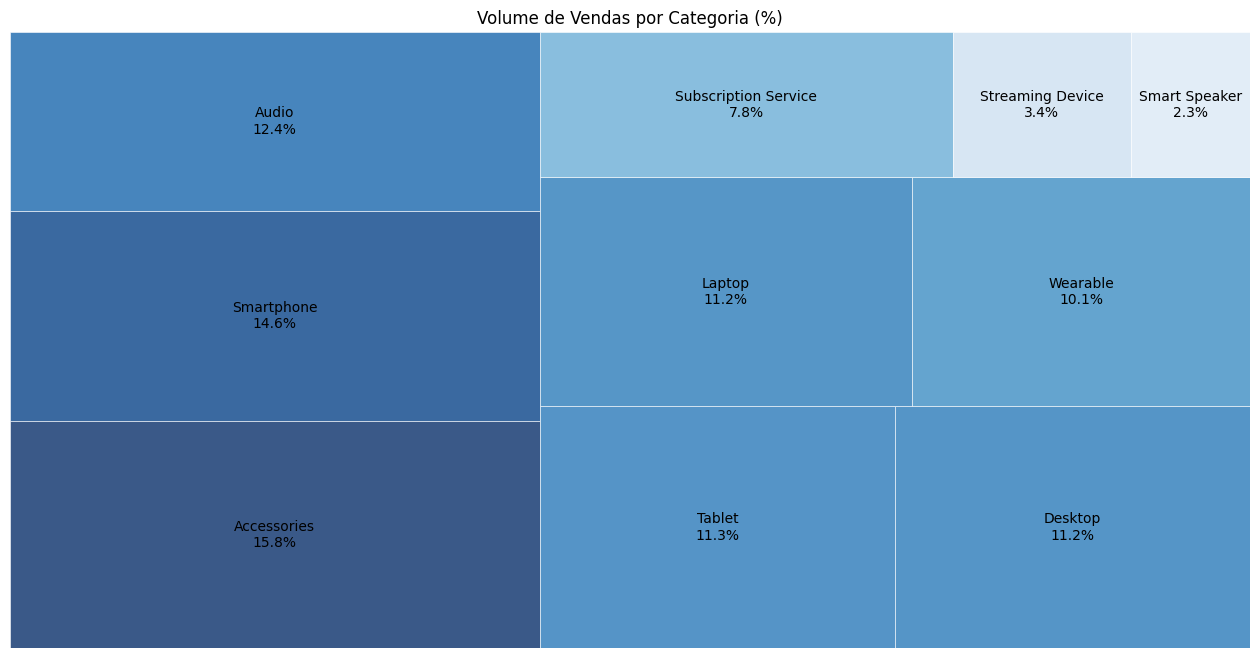

In [235]:
# calculando a proporção de cada categoria em relação ao total de vendas
total = df_volume_by_category['total_sales'].sum()
df_volume_by_category['percent'] = (df_volume_by_category['total_sales'] / total) * 100

# treemap com rótulos em porcentagem
plt.figure(figsize=(16,8))
squarify.plot(
    sizes=df_volume_by_category['total_sales'],
    label=[f"{cat}\n{perc:.1f}%" for cat, perc in zip(df_volume_by_category['category_name'], df_volume_by_category['percent'])],
    color=plt.cm.Blues(df_volume_by_category['total_sales'] / max(df_volume_by_category['total_sales'])),
    alpha=0.8,
    edgecolor='white',
    linewidth=0.5
)
plt.title('Volume de Vendas por Categoria (%)')
plt.axis('off')
plt.show()

- Produtos recém-lançados estão performando bem?

In [222]:
# convertendo novamente 'launch_date' para datetime
df_sales_merged = convert_dates(
  df_sales_merged,
  'launch_date',
  fmt='%Y-%m-%d'
)

In [223]:
df_sales_years = df_sales_merged['launch_date'].dt.year
df_sales_years.unique()

array([2021, 2020, 2024, 2022, 2023], dtype=int32)

In [224]:
# foi identificada uma inconsistência temporal na base: 
# existem vendas registradas antes da data oficial de lançamento dos produtos.
# para evitar conflitos e análises distorcidas, foi aplicado um filtro apenas para as vendas válidas 
# (sale_date >= launch_date) antes de realizar os agrupamentos
df_sales_valid = df_sales_merged[ df_sales_merged['sale_date'] >= df_sales_merged['launch_date'] ]

In [225]:
# performance dos produtos recém lançados
df_newly_launched = (
  df_sales_valid
  .groupby('product_name')
  .agg(
    total_sales=('sale_id', 'count'),
    # primeira venda registrada
    first_sale_date=('sale_date', 'min'),
    # última venda registrada
    last_sale_date=('sale_date', 'max'),
    launch_date=('launch_date', 'max')
  )
  .sort_values('launch_date', ascending=False)
  .head(10)
)

df_newly_launched


,total_sales,first_sale_date,last_sale_date,launch_date
product_name,,,,
Apple TV+,75,2024-11-04,2024-11-12,2024-11-04
iPhone 14 Pro Max,246,2024-10-07,2024-11-12,2024-10-07
AirPods Pro,250,2024-10-06,2024-11-12,2024-10-06
Apple Arcade,416,2024-09-13,2024-11-12,2024-09-13
Apple Watch Ultra,475,2024-08-30,2024-11-12,2024-08-30
iPhone 12 Pro,687,2024-08-03,2024-11-12,2024-08-03
Apple Pencil (1st Generation),897,2024-06-30,2024-11-12,2024-06-30
MacBook Pro (Touch Bar),970,2024-06-17,2024-11-12,2024-06-17
Magic Trackpad,1109,2024-05-25,2024-11-12,2024-05-25


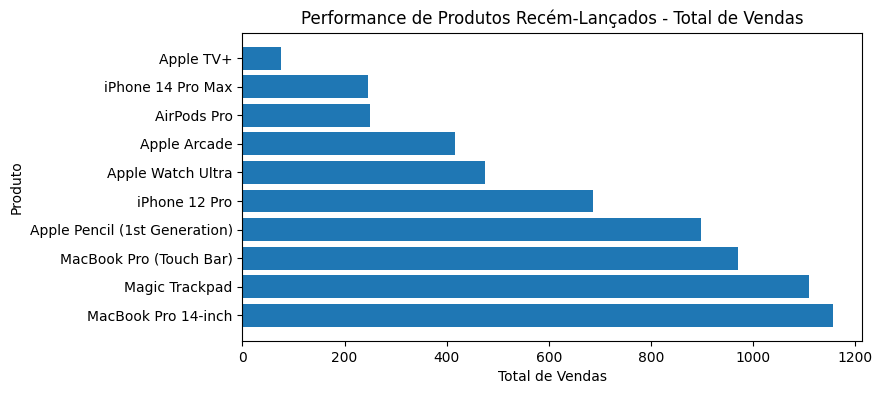

In [226]:
# gráfico de barras horizontais
# resetando o índice para garantir que product_name seja lido como coluna
df_plot = df_newly_launched.reset_index()

plt.figure(figsize=(8,4))
plt.barh(
  df_plot['product_name'], 
  df_plot['total_sales']
)
plt.title("Performance de Produtos Recém-Lançados - Total de Vendas")
plt.xlabel("Total de Vendas")
plt.ylabel("Produto")
plt.gca().invert_yaxis()
plt.show()

- Existe correlação entre preço e volume vendido?

In [227]:
# correlação de pearson
# para entender o poder de explicação da variável preço 
# sobre o volume de vendas
df_price_sales = (
  df_sales_merged
  .groupby('price', as_index=False)
  .agg(
    total_sales=('sale_id', 'count')
  )
)

df_price_sales.corr().round(2)

,price,total_sales
price,1.00,-0.02
total_sales,-0.02,1.00


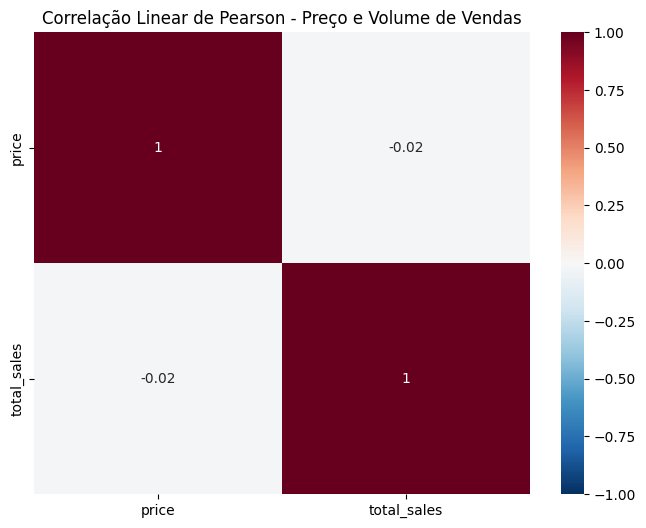

In [228]:
# gráfico correlação linear de pearson
plt.figure(figsize=(8,6))
sns.heatmap(
  df_price_sales.corr(),
  cmap='RdBu_r',
  vmin=-1, vmax=1,
  annot=True
)
plt.title('Correlação Linear de Pearson - Preço e Volume de Vendas')
plt.show()

**Interpretação**

O resultado da correlação de pearson entre preço e volume vendido foi **-0.02**, indicando uma relação praticamente neutra. Isso significa que, na base analisada, o preço não exerce influência linear significativa sobre o número de vendas.

### 🔹 Desempenho Geográfico e Por Unidade

- Qual loja gera maior faturamento?

In [229]:
# quantidade de lojas
df_sales_merged['store_name'].nunique()

69

In [230]:
# receita por loja
df_revenue_by_stores = (
  df_sales_merged
  .groupby('store_name')
  .agg(
    total_sales=('sale_id', 'count'),
    total_revenue=('total_revenue', 'sum'),
    city=('city', 'first'),
    country=('country', 'first')
  )
  .sort_values('total_revenue', ascending=False)
  .head(10)
)

df_revenue_by_stores

,total_sales,total_revenue,city,country
store_name,,,,
Apple Chadstone,27851,165220023,Melbourne,Australia
Apple Covent Garden,27803,165176160,London,United Kingdom
Apple The Dubai Mall,27742,163741158,Dubai,UAE
Apple Orchard Road,27487,162709375,Singapore,Singapore
Apple Central World,27576,162552209,Bangkok,Thailand
Apple Champs-Elysees,27391,161720430,Paris,France
Apple Dubai Mall,14113,84478026,Dubai,UAE
Apple Southland,14057,83830993,Cheltenham,Australia
Apple Kyoto,14018,83706593,Kyoto,Japan


- Qual país lidera em faturamento?

In [231]:
# número de cidades distintas por país
df_city_count = (
    df_sales_merged
    .groupby('country')['city']
    .nunique()
    .reset_index(name='num_cities')
)
df_city_count = df_city_count[df_city_count['num_cities'] > 1]
df_city_count.sort_values('num_cities', ascending=False)


,country,num_cities
18,United States,11
0,Australia,5
3,China,5
2,Canada,4
8,Japan,4
6,Germany,3
7,Italy,2
16,UAE,2


In [232]:
# receita por país
df_revenue_by_country = (
  df_sales_merged
  .groupby('country')
  .agg(
    total_sales=('sale_id', 'count'),
    total_revenue=('total_revenue', 'sum')
  )
  .sort_values('total_revenue', ascending=False)
  .head(10)
)

df_revenue_by_country

,total_sales,total_revenue
country,,
United States,207728,1234842804
Australia,97280,577191700
China,97022,575151496
Japan,83697,495948710
UAE,69395,412424721
Canada,69468,410740833
United Kingdom,55527,328969720
France,55119,325659768
Germany,41977,248821585


In [233]:
# resetando o índice para que 'country' seja lido como coluna
df_revenue_by_country = df_revenue_by_country.reset_index()

In [234]:
# mapa coroplético 
fig = px.choropleth(
  df_revenue_by_country,
  locations='country',
  locationmode='country names',
  color='total_revenue',
  color_continuous_scale='Blues',
  title='Faturamento por País'
)
fig.update_layout(
    width=800,  
    height=400 ,  
    margin=dict(l=20, r=20, t=50, b=20)
)
fig.show()

### 🔹 Risco e Incidência de Garantias

- Qual é a taxa geral de garantia?

- Quais produtos têm maior número de chamados?